In [1]:
#reading in excel file
import pandas as pd
data = pd.read_excel('/Users/lukelambert/Desktop/NCAA_XC.xlsx', sheet_name=None)

df = data['Women 2018']
print(df.columns)


Index(['placement', 'name', 'time', 'team', 'year', 'race1 name',
       'placement.1', 'time.1', 'race2 name', 'placement.2', 'time.2',
       'race 3name', 'placement.3', 'time.3', 'conference', 'placement.4',
       'time.4', 'region', 'placement.5', 'time.5', 'prior NCAA place',
       'time.6'],
      dtype='object')


In [2]:
#renaming columns
keep = ['placement', 'name', 'time', 'team', 'year', 'conference', 'placement.4', 'region', 'placement.5', 'prior NCAA place']
df = df[keep]
temp = df.rename(columns={'placement': 'ncaaPlace', 'placement.4': 'conferencePlace', 'placement.5': 'regionPlace', 'prior NCAA place': 'ncaaPriorPlace', 'time': 'ncaaTime'}, inplace=False)
df = temp

In [3]:
#fixing the placement columns
import numpy as np
import re

df.fillna('n/a', inplace=True)
def ordinal_to_int(ordinal_str):
    if ordinal_str == 'n/a':
        return np.nan
    return int(''.join(filter(str.isdigit, ordinal_str)))

df['conferencePlace'] = df['conferencePlace'].apply(ordinal_to_int)
df['regionPlace'] = df['regionPlace'].apply(ordinal_to_int)
df['ncaaPriorPlace'] = df['ncaaPriorPlace'].apply(ordinal_to_int)

print(len(df))

255


Linear Regression R-squared: 0.4254
Quadratic Regression R-squared: 0.4258


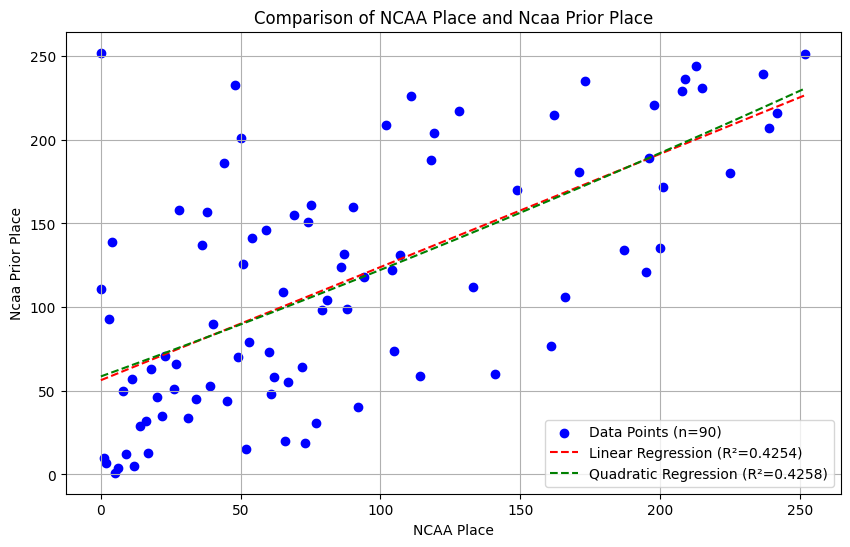

In [4]:
#comparison of NCAA Place and Prior NCAA Place

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score


filtered_df = df.copy()
filtered_df.dropna(subset=['ncaaPlace', 'ncaaPriorPlace'], inplace=True)
filtered_df = filtered_df[filtered_df['ncaaPlace'] != 'DNF']

filtered_df = filtered_df.sort_values(by='ncaaPlace')
num_points = len(filtered_df)


plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['ncaaPlace'], filtered_df['ncaaPriorPlace'], color='blue', label=f'Data Points (n={num_points})')

plt.xlabel('NCAA Place')
plt.ylabel('Ncaa Prior Place')
plt.title('Comparison of NCAA Place and Ncaa Prior Place')
plt.grid(True)

# Linear regression
linear_coeffs = np.polyfit(filtered_df['ncaaPlace'], filtered_df['ncaaPriorPlace'], 1)
linear_regression_line = np.polyval(linear_coeffs, filtered_df['ncaaPlace'])
plt.plot(filtered_df['ncaaPlace'], linear_regression_line, color='red', linestyle='--', label=f'Linear Regression (R²={r2_score(filtered_df["ncaaPriorPlace"], linear_regression_line):.4f})')

# Quadratic regression
quadratic_coeffs = np.polyfit(filtered_df['ncaaPlace'], filtered_df['ncaaPriorPlace'], 2)
quadratic_regression_line = np.polyval(quadratic_coeffs, filtered_df['ncaaPlace'])
plt.plot(filtered_df['ncaaPlace'], quadratic_regression_line, color='green', linestyle='--', label=f'Quadratic Regression (R²={r2_score(filtered_df["ncaaPriorPlace"], quadratic_regression_line):.4f})')

# Calculate R-squared for linear regression
linear_r2 = r2_score(filtered_df['ncaaPriorPlace'], linear_regression_line)

# Calculate R-squared for quadratic regression
quadratic_r2 = r2_score(filtered_df['ncaaPriorPlace'], quadratic_regression_line)

# Print R² values
print(f"Linear Regression R-squared: {linear_r2:.4f}")
print(f"Quadratic Regression R-squared: {quadratic_r2:.4f}")


plt.legend()
plt.show()

Linear Regression R-squared: 0.4321
Quadratic Regression R-squared: 0.4884


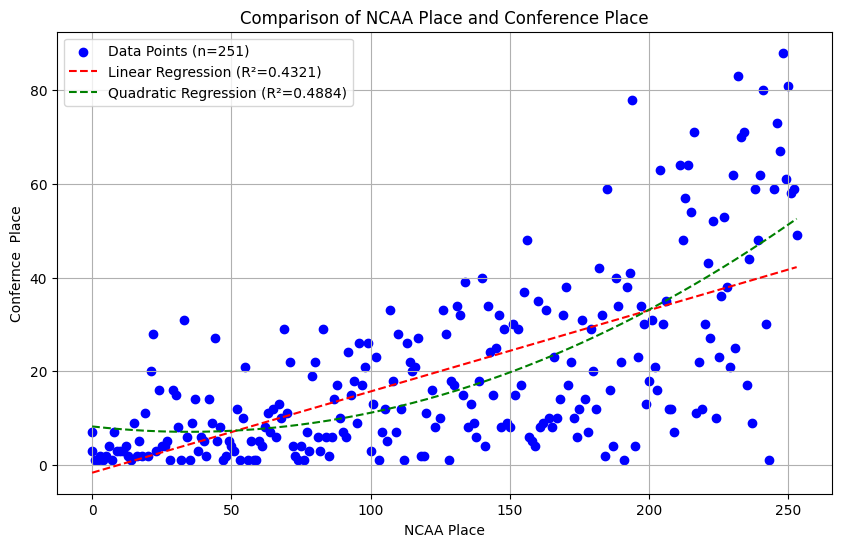

In [5]:
filtered_df = df.copy()
filtered_df.dropna(subset=['ncaaPlace', 'conferencePlace'], inplace=True)
filtered_df = filtered_df[filtered_df['ncaaPlace'] != 'DNF']
filtered_df = filtered_df[filtered_df['conferencePlace'] != 'DNF']


filtered_df = filtered_df.sort_values(by='ncaaPlace')

num_points = len(filtered_df)


plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['ncaaPlace'], filtered_df['conferencePlace'], color='blue', label=f'Data Points (n={num_points})')

plt.xlabel('NCAA Place')
plt.ylabel('Confernce  Place')
plt.title('Comparison of NCAA Place and Conference Place')
plt.grid(True)

# Linear regression
linear_coeffs = np.polyfit(filtered_df['ncaaPlace'], filtered_df['conferencePlace'], 1)
linear_regression_line = np.polyval(linear_coeffs, filtered_df['ncaaPlace'])
plt.plot(filtered_df['ncaaPlace'], linear_regression_line, color='red', linestyle='--', label=f'Linear Regression (R²={r2_score(filtered_df["conferencePlace"], linear_regression_line):.4f})')

# Quadratic regression
quadratic_coeffs = np.polyfit(filtered_df['ncaaPlace'], filtered_df['conferencePlace'], 2)
quadratic_regression_line = np.polyval(quadratic_coeffs, filtered_df['ncaaPlace'])
plt.plot(filtered_df['ncaaPlace'], quadratic_regression_line, color='green', linestyle='--', label=f'Quadratic Regression (R²={r2_score(filtered_df["conferencePlace"], quadratic_regression_line):.4f})')

# Calculate R-squared for linear regression
linear_r2 = r2_score(filtered_df['conferencePlace'], linear_regression_line)

# Calculate R-squared for quadratic regression
quadratic_r2 = r2_score(filtered_df['conferencePlace'], quadratic_regression_line)

# Print R² values
print(f"Linear Regression R-squared: {linear_r2:.4f}")
print(f"Quadratic Regression R-squared: {quadratic_r2:.4f}")


plt.legend()

plt.show()

Linear Regression R-squared: 0.4371
Quadratic Regression R-squared: 0.4849


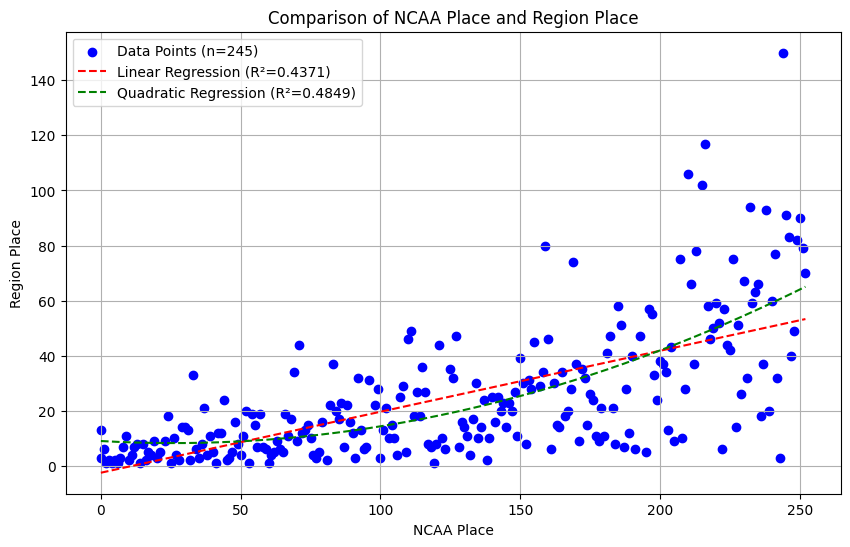

In [6]:
filtered_df = df.copy()
filtered_df.dropna(subset=['ncaaPlace', 'regionPlace'], inplace=True)
filtered_df = filtered_df[filtered_df['ncaaPlace'] != 'DNF']
filtered_df = filtered_df.sort_values(by='ncaaPlace')

num_points = len(filtered_df)



plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['ncaaPlace'], filtered_df['regionPlace'], color='blue', label=f'Data Points (n={num_points})')

plt.xlabel('NCAA Place')
plt.ylabel('Region Place')
plt.title('Comparison of NCAA Place and Region Place')
plt.grid(True)


# Linear regression
linear_coeffs = np.polyfit(filtered_df['ncaaPlace'], filtered_df['regionPlace'], 1)
linear_regression_line = np.polyval(linear_coeffs, filtered_df['ncaaPlace'])
plt.plot(filtered_df['ncaaPlace'], linear_regression_line, color='red', linestyle='--', label=f'Linear Regression (R²={r2_score(filtered_df["regionPlace"], linear_regression_line):.4f})')

# Quadratic regression
quadratic_coeffs = np.polyfit(filtered_df['ncaaPlace'], filtered_df['regionPlace'], 2)
quadratic_regression_line = np.polyval(quadratic_coeffs, filtered_df['ncaaPlace'])
plt.plot(filtered_df['ncaaPlace'], quadratic_regression_line, color='green', linestyle='--', label=f'Quadratic Regression (R²={r2_score(filtered_df["regionPlace"], quadratic_regression_line):.4f})')

# Calculate R-squared for linear regression
linear_r2 = r2_score(filtered_df['regionPlace'], linear_regression_line)

# Calculate R-squared for quadratic regression
quadratic_r2 = r2_score(filtered_df['regionPlace'], quadratic_regression_line)

# Print R² values
print(f"Linear Regression R-squared: {linear_r2:.4f}")
print(f"Quadratic Regression R-squared: {quadratic_r2:.4f}")

plt.legend()
plt.show()

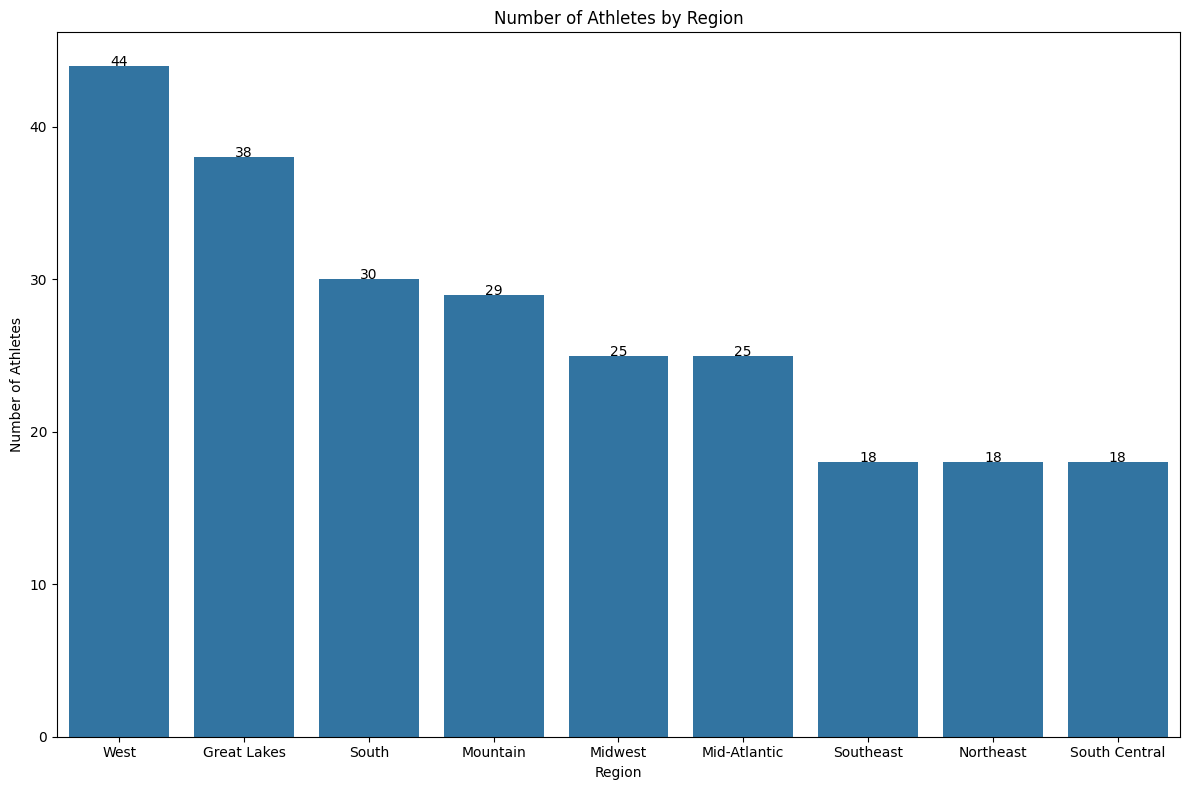

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

filtered_df = df.copy()

# Drop rows with missing values in the relevant columns
filtered_df.dropna(subset=['ncaaPlace', 'regionPlace'], inplace=True)

# Ensure 'ncaaPlace' is numeric
filtered_df = filtered_df[filtered_df['ncaaPlace'] != 'DNF']
filtered_df['ncaaPlace'] = pd.to_numeric(filtered_df['ncaaPlace'])

# Calculate the number of athletes for each region
region_counts = filtered_df['region'].value_counts().reset_index()
region_counts.columns = ['region', 'num_athletes']

# Plotting
plt.figure(figsize=(12, 8))

# Bar plot for the number of athletes per region
barplot = sns.barplot(x='region', y='num_athletes', data=region_counts)
plt.title('Number of Athletes by Region')
plt.xlabel('Region')
plt.ylabel('Number of Athletes')

# Add values on top of each bar
for index, row in region_counts.iterrows():
    barplot.text(row.name, row.num_athletes, round(row.num_athletes, 2), color='black', ha="center")


plt.tight_layout()
plt.show()

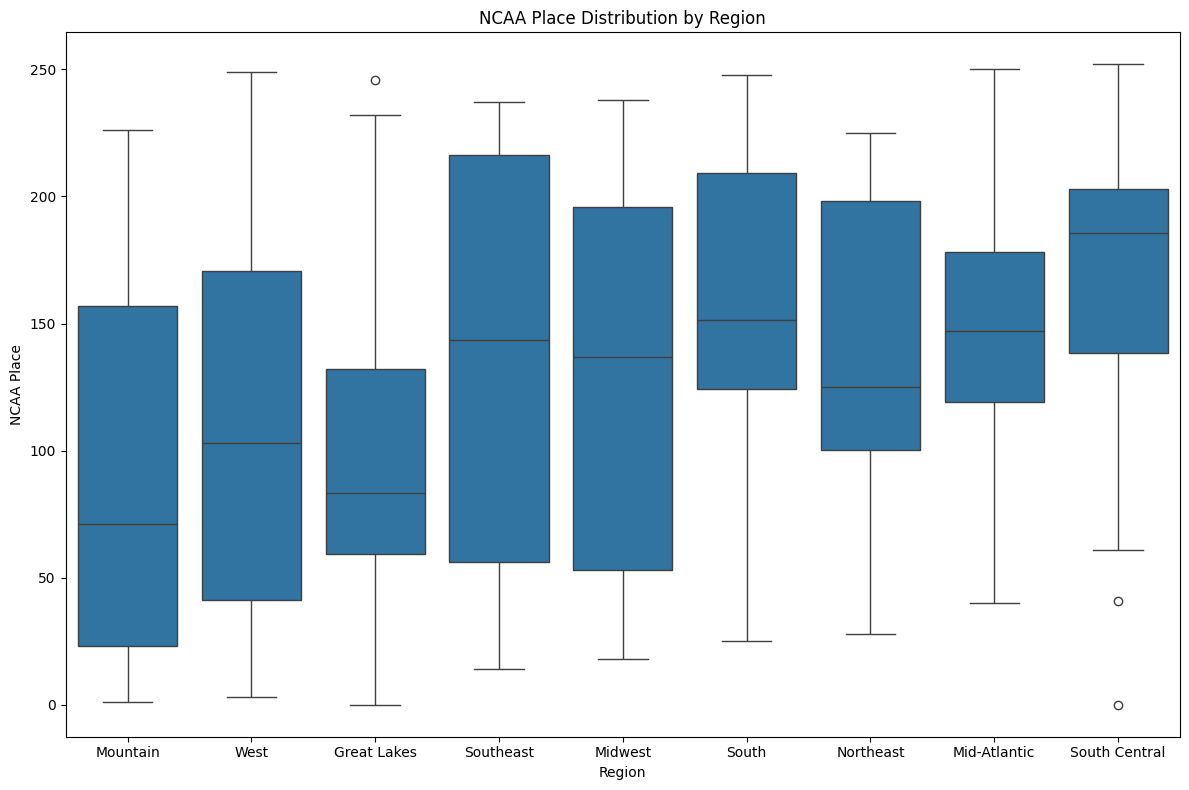

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

filtered_df = df.copy()
# Drop rows with missing values in the relevant columns
filtered_df.dropna(subset=['ncaaPlace', 'regionPlace'], inplace=True)

# Ensure 'ncaaPlace' is numeric
filtered_df = filtered_df[filtered_df['ncaaPlace'] != 'DNF']
filtered_df['ncaaPlace'] = pd.to_numeric(filtered_df['ncaaPlace'])

# Plotting
plt.figure(figsize=(12, 8))

# Box plot for ncaaPlace per region
sns.boxplot(x='region', y='ncaaPlace', data=filtered_df)
plt.title('NCAA Place Distribution by Region')
plt.xlabel('Region')
plt.ylabel('NCAA Place')

plt.tight_layout()
plt.show()